# 9 pandas分组和聚合
设置索引

In [4]:
import numpy as np
import pandas as pd

In [5]:
#索引中单项不可变，但是整体可以换掉
a = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                  'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                  'd': list("hjklmno")})
a

,a,b,c,d
0,0,7,one,h
1,1,6,one,j
2,2,5,one,k
3,3,4,two,l
4,4,3,two,m
5,5,2,two,n
6,6,1,two,o


In [12]:
c = a.copy()
a.index = list("abcdefg")  # a的索引变了，a.index更换索引
print(c)
print("-" * 100)
print(a)
print("-" * 100)
print(c.values.shape)
print("-" * 100)
print(c.values)
print("-" * 100)
print(a.columns)
print("-" * 100)
print(a.index)
print("-" * 100)

   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
----------------------------------------------------------------------------------------------------
   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
----------------------------------------------------------------------------------------------------
(7, 4)
----------------------------------------------------------------------------------------------------
[[0 7 'one' 'h']
 [1 6 'one' 'j']
 [2 5 'one' 'k']
 [3 4 'two' 'l']
 [4 3 'two' 'm']
 [5 2 'two' 'n']
 [6 1 'two' 'o']]
----------------------------------------------------------------------------------------------------
Index(['a', 'b', 'c', 'd'], dtype='object')
----------------------------------------------------------------------------------------------------
Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')


# 时间序列

In [13]:
pd.date_range(start="20190101", end="20190201")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.date_range(start="20250107", periods=10, freq="B")  # freq可以为D,W,M,Q,A，分别表示日，周，月，季度，年，B表示business day

DatetimeIndex(['2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-20'],
              dtype='datetime64[ns]', freq='B')

In [16]:
pd.date_range(start="20190101", periods=10, freq="MS")  # MS表示每个月的第一天

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [19]:
pd.date_range(start="20230710", periods=10, freq="W")  # 拿每周的周日生成


DatetimeIndex(['2023-07-16', '2023-07-23', '2023-07-30', '2023-08-06',
               '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03',
               '2023-09-10', '2023-09-17'],
              dtype='datetime64[ns]', freq='W-SUN')

In [22]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 5)
s

0     3/11/2000
1     3/12/2000
2     3/13/2000
3     3/11/2000
4     3/12/2000
5     3/13/2000
6     3/11/2000
7     3/12/2000
8     3/13/2000
9     3/11/2000
10    3/12/2000
11    3/13/2000
12    3/11/2000
13    3/12/2000
14    3/13/2000
dtype: object

In [23]:
#timeit可以统计执行耗时，to_datetime把字符串转为时间格式
pd.to_datetime(s)

0    2000-03-11
1    2000-03-12
2    2000-03-13
3    2000-03-11
4    2000-03-12
5    2000-03-13
6    2000-03-11
7    2000-03-12
8    2000-03-13
9    2000-03-11
10   2000-03-12
11   2000-03-13
12   2000-03-11
13   2000-03-12
14   2000-03-13
dtype: datetime64[ns]

In [27]:
# 实战灭国911数据
import matplotlib.pyplot as plt

# 把时间字符串转为时间类型设置为索引
df = pd.read_csv("911.csv")
print(df.head())
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]  # i[0]就是EMS Fire Traffic
# print(cate_list)
# print(np.array(cate_list).reshape((df.shape[0], 1)))
# 添加一列
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))
df.set_index("timeStamp", inplace=True)
df.head(10)

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & 

,lat,lng,desc,zip,title,twp,addr,e,cate
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
2015-12-10 16:46:48,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
2015-12-10 16:17:05,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
2015-12-10 16:51:42,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS


timeStamp
2015-12-31    3898
2016-01-31    6063
2016-02-29    5413
2016-03-31    5832
2016-04-30    5684
2016-05-31    5730
2016-06-30    5720
2016-07-31    6029
2016-08-31    6005
2016-09-30    5750
2016-10-31    6039
2016-11-30    5838
2016-12-31    6024
2017-01-31    6082
2017-02-28    5417
2017-03-31    5913
2017-04-30    5780
2017-05-31    5948
2017-06-30    6030
2017-07-31    5974
2017-08-31    5882
2017-09-30    3789
Freq: M, Name: title, dtype: int64
timeStamp
2015-12-31    1095
2016-01-31    1904
2016-02-29    1868
2016-03-31    1589
2016-04-30    1717
2016-05-31    1573
2016-06-30    1787
2016-07-31    1898
2016-08-31    1907
2016-09-30    1793
2016-10-31    1930
2016-11-30    1765
2016-12-31    1846
2017-01-31    1658
2017-02-28    1462
2017-03-31    1634
2017-04-30    1614
2017-05-31    1670
2017-06-30    1986
2017-07-31    1754
2017-08-31    1862
2017-09-30    1120
Freq: M, Name: title, dtype: int64
timeStamp
2015-12-31    2923
2016-01-31    5129
2016-02-29    4115
2016-03

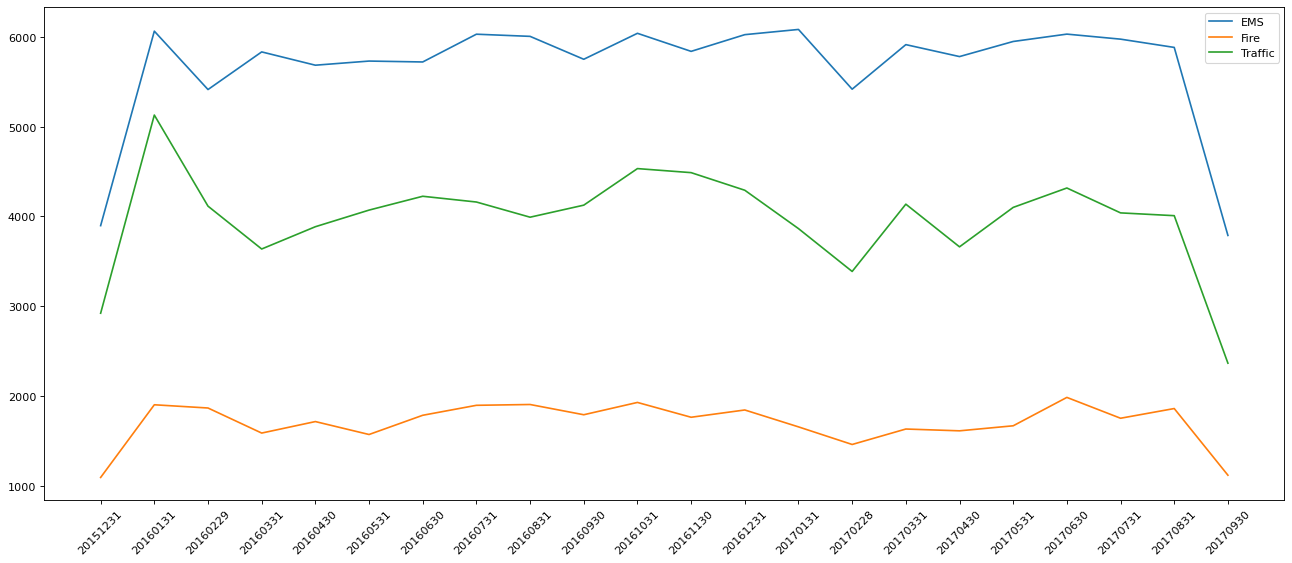

In [28]:
plt.figure(figsize=(20, 8), dpi=80)

# 分组，一图多线
# resample降采样，按月统计，索引必须是时间类型，类似groupby
for group_name, group_data in df.groupby(by="cate"):
    # 对不同的分类都进行绘图
    count_by_month = group_data.resample("M").count()["title"]  # 降采样，按月统计
    print(count_by_month)
    # 画图
    _x = count_by_month.index
    _y = count_by_month.values

    _x = [i.strftime("%Y%m%d") for i in _x]  # 变更年月日格式
    plt.plot(_x, _y, label=group_name)

plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()

# 分组运算

In [33]:
import numpy as np

# 分组后给名称加前缀
dict_obj = {'key1': ['a', 'b', 'a', 'b',
                     'a', 'b', 'a', 'a'],
            'key2': ['one', 'one', 'two', 'three',
                     'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}

df_obj = pd.DataFrame(dict_obj)
print(df_obj)
print("-" * 100)
# 按key1分组，计算data1， date2的统计信息并附加到原始表格中，并添加表头前缀
k1_sum = df_obj.groupby('key1').mean().add_prefix('mean_')
print(k1_sum)

  key1   key2  data1  data2
0    a    one      6      1
1    b    one      7      4
2    a    two      6      7
3    b  three      2      1
4    a    two      2      9
5    b    two      8      7
6    a    one      3      5
7    a  three      6      4
----------------------------------------------------------------------------------------------------
      mean_data1  mean_data2
key1                        
a       4.600000         5.2
b       5.666667         4.0


In [34]:
# 方法2，使用transform，分组后计算结果和原本的df保持一致
k1_sum_tf = df_obj.groupby("key1").transform(np.mean).add_prefix("mean_")
print(k1_sum_tf)

   mean_data1  mean_data2
0    4.600000         5.2
1    5.666667         4.0
2    4.600000         5.2
3    5.666667         4.0
4    4.600000         5.2
5    5.666667         4.0
6    4.600000         5.2
7    4.600000         5.2


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17856\681404826.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  k1_sum_tf = df_obj.groupby("key1").transform(np.mean).add_prefix("mean_")
